# Fill in your name!

In [77]:
YOUR_NAME = "FILL THIS IN!!!!!!!"

# imports and constants

In [73]:
import pickle
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np
from IPython.display import display, clear_output

In [47]:
CATEGORIES = ["one", "two", "three"]

In [48]:
#BASE_PATH_INFO = "http://thumbnails.visually.netdna-cdn.com/most-trendy-outfit-january-2013_510ba1d15148b.jpg"
BASE_PATH_INFO = "../downloaded_infographics/"
BASE_PATH_DATA = "../visuallydata/"
SAMPLE_INFOGRAPHIC = "most-trendy-outfit-january-2013_510ba1d15148b.jpg"

In [49]:
INFOGRAPHICS = [SAMPLE_INFOGRAPHIC]

In [50]:
LABELS_FILE = YOUR_NAME + "_hand_icon_labels.txt"
LABELS_FILE

'anelise_hand_icon_labels.txt'

# download bounding boxes

In [51]:
detectionsList = pickle.load(open(BASE_PATH_DATA + "detectionsList_classified.pckl", "rb"))

In [71]:
def show_bbox(im, encoded_bbox): 
    im = Image.open(im)
    w,h = im.size
    
    bboxnums = encoded_bbox.split(" ")
    left = int(w*float(bboxnums[0])/1000.0)
    top = int(h*float(bboxnums[1])/1000.0)
    right = int(w*float(bboxnums[2])/1000.0)
    bottom = int(h*float(bboxnums[3])/1000.0)
    width = right - left
    height = bottom - top
    
    cropped_im = im.crop((left, top, right, bottom))
#     %matplotlib inline
#     imshow(np.asarray(cropped_im))
    display(cropped_im)

# Helpers

In [62]:
def print_instructions(): 
    print("For each icon, please identify the most relevant categories.")
    print("Please write the three most relevant ids, IN ORDER")
    print("For instance, if you think the most relevant category for the icon is <category 1>, the next most relevant is <category 2>, and the third most relevant is <category 3>, you would input `1 2 3` in the input box.")
    print("The category ids are as below in the form <category id>: <category name>")
    print("\n")
    
#print_instructions()

In [63]:
def print_category_options(): 
    print("CATEGORY OPTIONS: ")
    for i, elt in enumerate(CATEGORIES): 
        print("\t%d: %s" % (i, elt))
    print("\n")
#print_category_options()

In [64]:
def get_cat_labels(): 
    return input('Write down your top three category labels for this icon, in order.')

In [75]:
def write_label(infographic_name, icon_idx, answer): 
    print("writing!")
    line = "%s %d %s\n" % (infographic_name, icon_idx, answer)
    with open(LABELS_FILE, 'a') as outfile: 
        outfile.write(line)

# Run task

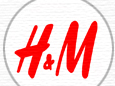

KeyboardInterrupt: 

In [76]:
print_instructions()
print_category_options()
for info in INFOGRAPHICS: 
    bboxes = detectionsList[info]
    for i, bbox in enumerate(bboxes): 
        show_bbox(BASE_PATH_INFO + info, bbox)
        answer = get_cat_labels()
        write_label(info, i, answer)
        clear_output()    